## Python statistics essential training - 03_05_morevariables

Standard imports

In [47]:
import numpy as np
import pandas as pd

In [42]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from ipywidgets import interact

%matplotlib inline

In [12]:
gapminder = pd.read_csv('gapminder.csv')
gapminder.head(3)

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662


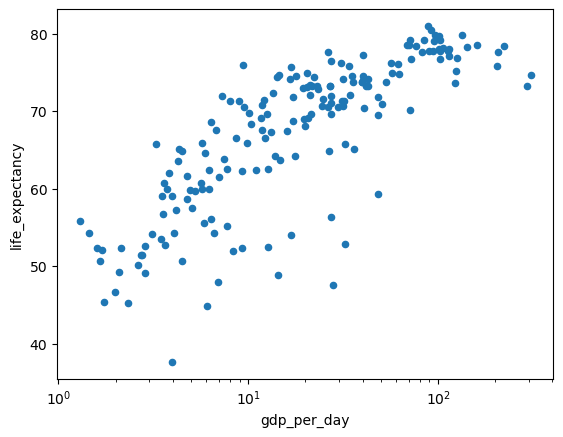

In [46]:
def plotyear(year):
    gapminder[gapminder.year == year].plot.scatter('gdp_per_day','life_expectancy',logx=True)
plotyear(2000)

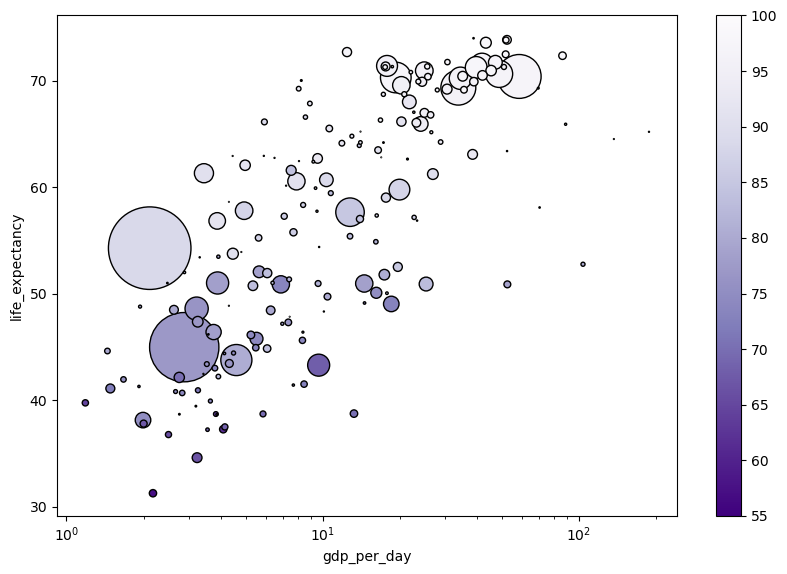

In [18]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.colormaps['Purples_r'], vmin=55, vmax=100,
                      linewidths=1, edgecolors='k', sharex=False,
                      figsize=(10,6.5))

plotyear(1965)

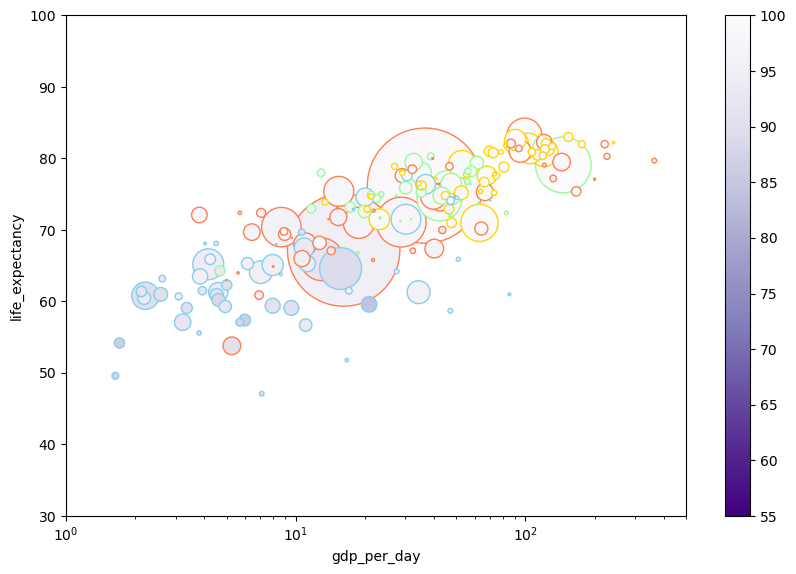

In [27]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.colormaps['Purples_r'], vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))

    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(2015)

In [44]:
interact(plotyear,year=range(1965,2016,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [34]:
gapminder[gapminder.year == 2015].population.sum()

7292414176.0

In [35]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

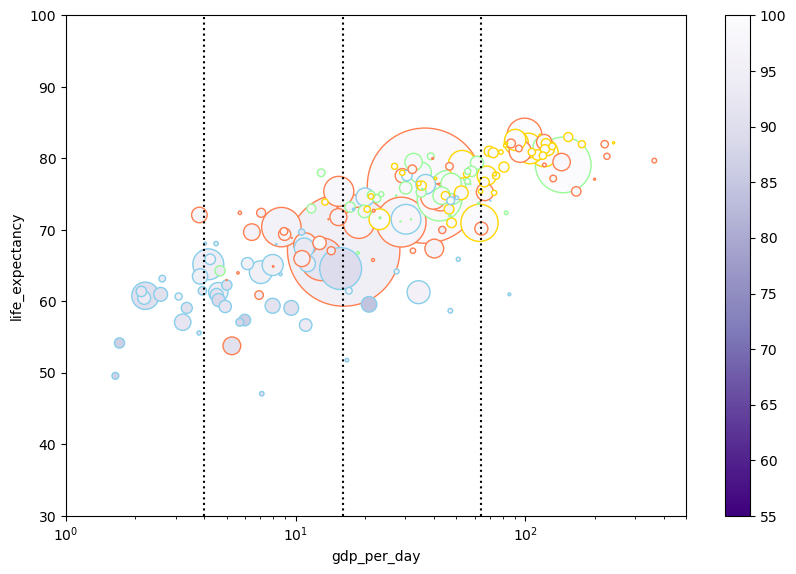

In [38]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.colormaps['Purples_r'], vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))

    for level in [4,16,64]:
        pp.axvline(level,linestyle=':',color='k')
    
    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(2015)

array([[<Axes: xlabel='log10_gdp_per_day', ylabel='log10_gdp_per_day'>,
        <Axes: xlabel='life_expectancy', ylabel='log10_gdp_per_day'>,
        <Axes: xlabel='age5_surviving', ylabel='log10_gdp_per_day'>,
        <Axes: xlabel='babies_per_woman', ylabel='log10_gdp_per_day'>],
       [<Axes: xlabel='log10_gdp_per_day', ylabel='life_expectancy'>,
        <Axes: xlabel='life_expectancy', ylabel='life_expectancy'>,
        <Axes: xlabel='age5_surviving', ylabel='life_expectancy'>,
        <Axes: xlabel='babies_per_woman', ylabel='life_expectancy'>],
       [<Axes: xlabel='log10_gdp_per_day', ylabel='age5_surviving'>,
        <Axes: xlabel='life_expectancy', ylabel='age5_surviving'>,
        <Axes: xlabel='age5_surviving', ylabel='age5_surviving'>,
        <Axes: xlabel='babies_per_woman', ylabel='age5_surviving'>],
       [<Axes: xlabel='log10_gdp_per_day', ylabel='babies_per_woman'>,
        <Axes: xlabel='life_expectancy', ylabel='babies_per_woman'>,
        <Axes: xlabel='age5_sur

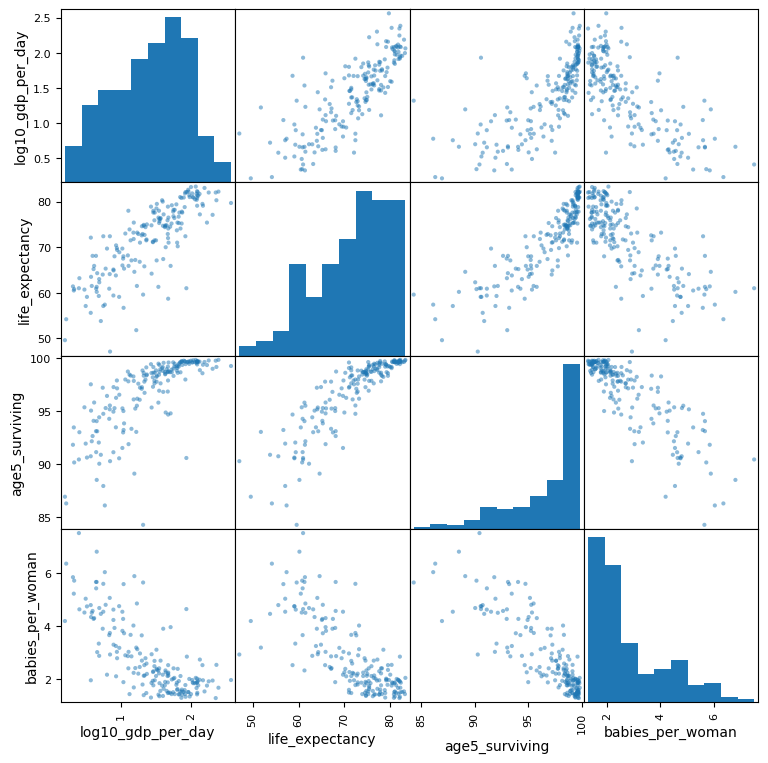

In [40]:
gapminder['log10_gdp_per_day'] = np.log10(gapminder['gdp_per_day'])
data = gapminder.loc[gapminder.year == 2015,['log10_gdp_per_day','life_expectancy','age5_surviving','babies_per_woman']]


pandas.plotting.scatter_matrix(data,figsize=(9,9))